In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import json

In [2]:
df = pd.read_csv('final.csv').drop(columns = 'Unnamed: 0')
df['Event_start_time'] = pd.to_datetime(df['Event_start_time'] , utc=True)
df

,Device_ID,Event_ID,Event_start_time,Name_of_cat,Weight_of_cat,Activity,Cat_In_Box,Synapse_Labeled,Event_Date,Event_start_time_hour,...,Points_Percentage,Stepping_In_Time,Stepping_Out_Time,Sit_Time,Times_Stepped,First_Stepin_Time,First_Stepout_Time,Last_Stepin_Time,Last_Stepout_Time,Weight_Variance
0,VA00000000000017,RXZlbnRJbmZvcm1hdGlvbjo0OWQ4M2I3MS1kNDZmLTRiYj...,2020-09-05 05:56:11+00:00,Ryan,7357.0,urination,1,0,2020-09-05,5,...,0.291447,0.025000,44.299942,44.274942,1,0.025000,44.299942,0.025000,44.299942,2.087515e+05
1,VA00000000000017,RXZlbnRJbmZvcm1hdGlvbjo0YmI3ZDc5YS0wNzMwLTQ0MT...,2020-07-18 09:41:37+00:00,Ryan,6935.0,urination,1,1,2020-07-18,9,...,0.470313,0.025000,52.550000,52.525000,2,0.025000,52.550000,52.575000,52.700000,1.586288e+05
2,VA00000000000017,RXZlbnRJbmZvcm1hdGlvbjo0ZTBhMDVhOC0wZmI2LTQ2MG...,2020-09-03 10:43:43+00:00,Ryan,7357.0,urination,1,0,2020-09-03,10,...,0.429688,1.374937,45.274949,43.900012,1,1.374937,45.274949,1.374937,45.274949,2.463771e+05
3,VA00000000000017,RXZlbnRJbmZvcm1hdGlvbjo1NGEwMTg2My01NDhjLTRhYT...,2020-09-01 07:02:05+00:00,Ryan,6983.0,non_elimination,1,0,2020-09-01,7,...,0.168675,0.025000,10.849935,10.824935,1,0.025000,10.849935,0.025000,10.849935,1.770790e+06
4,VA00000000000017,RXZlbnRJbmZvcm1hdGlvbjo1YzQwMzE4MS1lNzhkLTQ3Nz...,2020-08-08 01:47:11+00:00,Ryan,7017.0,urination,1,1,2020-08-08,1,...,0.596481,0.025000,49.150000,49.125000,1,0.025000,49.150000,0.025000,49.150000,1.221349e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13070,VB00000000000192,RXZlbnRJbmZvcm1hdGlvbjplOTY1YzllOC01YWU1LTRmYj...,2021-08-23 20:36:18+00:00,Sparkler,4116.0,urination,1,0,2021-08-24,20,...,0.822213,0.025000,48.583258,48.558258,1,0.025000,48.583258,0.025000,48.583258,1.028918e+05
13071,VB00000000000192,RXZlbnRJbmZvcm1hdGlvbjpmNDMxM2YwNi1hNzk0LTQxMG...,2021-04-26 01:29:01+00:00,Sparkler,4604.0,non_elimination,1,0,2021-04-26,1,...,0.137613,53.392769,71.583398,18.190629,1,53.392769,71.583398,53.392769,71.583398,1.259322e+06
13072,VB00000000000192,RXZlbnRJbmZvcm1hdGlvbjpmYjQ3YzJkZi03ODY3LTQ3Zm...,2021-04-26 22:47:55+00:00,Sparkler,4416.0,urination,1,0,2021-04-27,22,...,0.565029,0.025000,77.893402,77.868402,1,0.025000,77.893402,0.025000,77.893402,8.579901e+04
13073,VB00000000000192,RXZlbnRJbmZvcm1hdGlvbjpmYTY2MzA0OC1kNjQ1LTQ5OD...,2021-09-01 20:15:57+00:00,Sparkler,4386.0,defecation,1,0,2021-09-02,20,...,0.948808,0.025000,194.742593,194.717593,1,0.025000,194.742593,0.025000,194.742593,3.478798e+04


# Basic EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13075 entries, 0 to 13074
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   Device_ID               13075 non-null  object             
 1   Event_ID                13075 non-null  object             
 2   Event_start_time        13075 non-null  datetime64[ns, UTC]
 3   Name_of_cat             12931 non-null  object             
 4   Weight_of_cat           13075 non-null  float64            
 5   Activity                13072 non-null  object             
 6   Cat_In_Box              13075 non-null  int64              
 7   Synapse_Labeled         13075 non-null  int64              
 8   Event_Date              13075 non-null  object             
 9   Event_start_time_hour   13075 non-null  int64              
 10  Given_Tare_Weight       12062 non-null  float64            
 11  Activity_Duration       13075 non-null  f

In [4]:
df.isnull().sum()

Device_ID                    0
Event_ID                     0
Event_start_time             0
Name_of_cat                144
Weight_of_cat                0
Activity                     3
Cat_In_Box                   0
Synapse_Labeled              0
Event_Date                   0
Event_start_time_hour        0
Given_Tare_Weight         1013
Activity_Duration            0
Calculated_Tare_Weight       0
Weight_With_Cat              0
Points_Count                 0
Points_Percentage            0
Stepping_In_Time             0
Stepping_Out_Time            0
Sit_Time                     0
Times_Stepped                0
First_Stepin_Time            0
First_Stepout_Time           0
Last_Stepin_Time             0
Last_Stepout_Time            0
Weight_Variance              0
dtype: int64

In [5]:
df.nunique()

Device_ID                    82
Event_ID                  13075
Event_start_time          13062
Name_of_cat                  51
Weight_of_cat              3233
Activity                      3
Cat_In_Box                    2
Synapse_Labeled               2
Event_Date                  468
Event_start_time_hour        24
Given_Tare_Weight          7825
Activity_Duration         11704
Calculated_Tare_Weight    12888
Weight_With_Cat           12895
Points_Count               5059
Points_Percentage          8518
Stepping_In_Time           1732
Stepping_Out_Time         10087
Sit_Time                  10097
Times_Stepped                55
First_Stepin_Time           861
First_Stepout_Time         9846
Last_Stepin_Time           2929
Last_Stepout_Time         10093
Weight_Variance           13023
dtype: int64

In [6]:
df.describe()

,Weight_of_cat,Cat_In_Box,Synapse_Labeled,Event_start_time_hour,Given_Tare_Weight,Activity_Duration,Calculated_Tare_Weight,Weight_With_Cat,Points_Count,Points_Percentage,Stepping_In_Time,Stepping_Out_Time,Sit_Time,Times_Stepped,First_Stepin_Time,First_Stepout_Time,Last_Stepin_Time,Last_Stepout_Time,Weight_Variance
count,13075.000000,13075.000000,13075.000000,13075.000000,12062.000000,13075.000000,13075.000000,13075.000000,13075.000000,13075.000000,13075.000000,13075.000000,13075.000000,13075.000000,13075.000000,13075.000000,13075.000000,13075.000000,1.307500e+04
mean,4873.135832,0.998470,0.018585,10.494532,8708.200796,112.914337,9056.645771,13929.781602,3041.284818,0.651802,2.811670,49.168721,46.357051,1.520076,1.013506,42.072055,10.697216,50.994964,1.170973e+06
std,900.457113,0.039082,0.135060,6.733233,5586.830853,58.472873,3458.582048,3497.006320,2269.219615,0.280332,12.090523,50.269576,47.258176,4.674665,7.537893,46.513690,30.509768,51.855917,1.634046e+06
min,0.000000,0.000000,0.000000,0.000000,-58703.000000,3.983949,-1734.125000,1249.350000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,4247.000000,1.000000,0.000000,5.000000,6832.000000,74.374931,6910.262500,11482.837500,1446.000000,0.437698,0.025000,6.080656,5.356997,1.000000,0.025000,0.824933,0.025000,6.271506,1.224386e+05
50%,4697.000000,1.000000,0.000000,9.000000,8898.000000,105.928439,8839.575000,13689.750000,2534.000000,0.640476,0.025000,39.499940,37.615800,1.000000,0.025000,32.074931,0.025000,41.574961,3.595626e+05
75%,5509.000000,1.000000,0.000000,16.000000,10990.000000,140.805793,10838.025000,15870.375000,4192.000000,0.939744,0.025000,70.887434,67.437442,1.000000,0.025000,62.874211,0.275000,74.420326,1.642937e+06
max,7968.000000,1.000000,1.000000,23.000000,62999.000000,669.461843,20009.400000,24454.400000,26592.000000,1.000000,281.449960,609.100881,609.075881,292.000000,281.124960,609.100881,426.597624,609.100881,2.383244e+07


In [7]:
#We have data of 13075 Activities from 51 cats across 82 devices, we have data of total 474 days (29-06-2020 - 16-10-2021)

<AxesSubplot:xlabel='Activity', ylabel='count'>

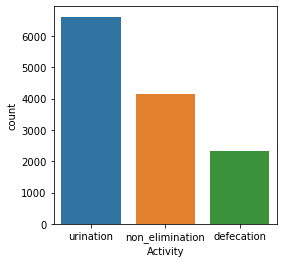

In [8]:
fig, ax = plt.subplots(figsize=(4, 4))
sns.countplot(ax=ax, x = df['Activity'])

# Most Activity is of Urination and least is of Defecation

In [9]:
df['Activity'].value_counts()

urination          6610
non_elimination    4146
defecation         2316
Name: Activity, dtype: int64

In [10]:
print(df['Event_Date'].min(), df['Event_Date'].max())

2020-06-29 2021-10-16


In [11]:
temp = df.groupby(['Device_ID']).mean()
temp['Given_Tare_Weight'].isnull()[:].value_counts()

# Out of 82 devices 7 devices have missing tare_weight

False    75
True      7
Name: Given_Tare_Weight, dtype: int64

In [12]:
len(df[(df['Cat_In_Box']==0)])

20

In [13]:
df['Synapse_Labeled'].value_counts()

0    12832
1      243
Name: Synapse_Labeled, dtype: int64

In [14]:
df[(df['Cat_In_Box']==0) & (df['Activity']!='non_elimination')]

# Only case when according to tags cat is not in box and urinating as well, but according to calcuations cat was in box

,Device_ID,Event_ID,Event_start_time,Name_of_cat,Weight_of_cat,Activity,Cat_In_Box,Synapse_Labeled,Event_Date,Event_start_time_hour,...,Points_Percentage,Stepping_In_Time,Stepping_Out_Time,Sit_Time,Times_Stepped,First_Stepin_Time,First_Stepout_Time,Last_Stepin_Time,Last_Stepout_Time,Weight_Variance
11025,VB00000000000177,RXZlbnRJbmZvcm1hdGlvbjphMDYzMmNhOS03NjhjLTQ3OW...,2021-04-23 04:32:58+00:00,Cartman,5178.0,urination,0,0,2021-04-23,4,...,0.355163,0.025,32.639855,32.614855,1,0.025,32.639855,0.025,32.639855,260961.208934


In [15]:
df[df['Weight_of_cat']==0]

,Device_ID,Event_ID,Event_start_time,Name_of_cat,Weight_of_cat,Activity,Cat_In_Box,Synapse_Labeled,Event_Date,Event_start_time_hour,...,Points_Percentage,Stepping_In_Time,Stepping_Out_Time,Sit_Time,Times_Stepped,First_Stepin_Time,First_Stepout_Time,Last_Stepin_Time,Last_Stepout_Time,Weight_Variance
3775,VA00000000000064,RXZlbnRJbmZvcm1hdGlvbjo0NGFkODI5NS03M2Y0LTQ4ZW...,2020-10-23 14:21:21+00:00,NaN,0.0,non_elimination,0,0,2020-10-23,14,...,0.995427,0.025,13.049932,13.024932,5,0.025,13.049932,16.599941,16.624941,157904.242952
3952,VA00000000000065,RXZlbnRJbmZvcm1hdGlvbjpjYTRjMDZiMi03Y2VjLTQ5MW...,2020-10-27 14:54:30+00:00,NaN,0.0,non_elimination,0,0,2020-10-27,14,...,1.000000,0.000,0.000000,0.000000,0,0.000,0.000000,0.000000,0.000000,471963.589530
3957,VA00000000000065,RXZlbnRJbmZvcm1hdGlvbjpkY2U3YzdhYS1kYTJhLTQyMD...,2020-10-26 14:04:11+00:00,NaN,0.0,non_elimination,0,0,2020-10-26,14,...,1.000000,0.000,0.000000,0.000000,0,0.000,0.000000,0.000000,0.000000,1378.488797


# Name of Cat

In [16]:
df['Name_of_cat'].unique()

array(['Ryan', 'Star Lord', 'Violet', 'Sparkler', 'Abby', 'Thor', 'Negan',
       'Marilyn', 'Kat', nan, 'Cartman', 'Fable', 'Tiana', 'Jessie',
       'Bucks', 'Patrick', 'Frank', 'Shadow', 'Vinny', 'Westley',
       'Stymie', 'Corned Beef', 'Boots', 'Betty Lou', 'Gremlin', 'Bill',
       'Fender', 'Husker', 'Doodle', 'Pandorica', 'Nimbus', 'Kansas',
       'Flop', 'Espresso', 'Eraser', 'Jason Voorhees', 'Monte', 'Vienna',
       'Mrs. Buttersworth', 'Azure', 'Cracker Jack', 'Spark', 'Gramps',
       'Lexi', 'Gamora', 'Marlowe', 'Lando', 'Zeb', 'Meera', 'Rowley',
       'Simon', 'Tardis'], dtype=object)

In [17]:
df['Name_of_cat'].nunique()
# Total number of cats

51

In [18]:
df[df['Name_of_cat'].isnull()]['Activity'].value_counts()

urination          78
non_elimination    34
defecation         32
Name: Activity, dtype: int64

In [19]:
len(df[df['Name_of_cat'].isnull()].groupby(['Device_ID'])['Device_ID'].count())
# Total number of devices with null cat names

21

In [20]:
#df[df['Name_of_cat'].isnull()][df['Name_of_cat'].isnull()].count()
df[df['Name_of_cat'].isnull()].groupby(['Device_ID'])['Device_ID'].count()
# Number of Null Name_of_cat for each device

Device_ID
VA00000000000037    16
VA00000000000038     3
VA00000000000042     5
VA00000000000047     1
VA00000000000048     1
VA00000000000055     9
VA00000000000059     1
VA00000000000064    42
VA00000000000065    48
VA00000000000067     1
VA00000000000113     2
VA00000000000137     1
VA00000000000142     1
VA00000000000144     1
VA00000000000145     3
VA00000000000148     2
VA00000000000155     2
VA00000000000156     1
VA00000000000159     1
VB00000000000171     1
VB00000000000173     2
Name: Device_ID, dtype: int64

## Cat weight description for different cats

In [21]:
df.groupby(['Name_of_cat'])['Weight_of_cat'].describe()

# Weight of Cat Variation across different cats after treating outlier

,count,mean,std,min,25%,50%,75%,max
Name_of_cat,,,,,,,,
Abby,394.0,4322.939086,203.947821,3448.0,4198.00,4265.00,4498.50,4823.0
Azure,512.0,4454.781250,144.923406,3863.0,4361.00,4415.00,4556.25,4932.0
Betty Lou,328.0,4452.760671,99.623096,4001.0,4393.00,4450.75,4524.25,4720.0
Bill,114.0,5365.307018,111.265578,5154.0,5298.00,5329.50,5419.00,5756.0
Boots,232.0,3607.875000,170.068606,3206.0,3470.75,3587.00,3746.25,4152.0
Bucks,73.0,5029.684932,122.615464,4740.0,4943.00,5009.00,5094.00,5344.0
Cartman,232.0,5198.821121,92.862891,4945.0,5143.25,5179.50,5243.75,5600.0
Corned Beef,314.0,5961.990446,119.147759,5421.0,5888.25,5947.00,6041.00,6292.0
Cracker Jack,319.0,4431.253918,176.287541,3591.0,4269.00,4496.00,4551.00,4817.0


## Name of cat and Activity relation

<AxesSubplot:xlabel='Name_of_cat', ylabel='count'>

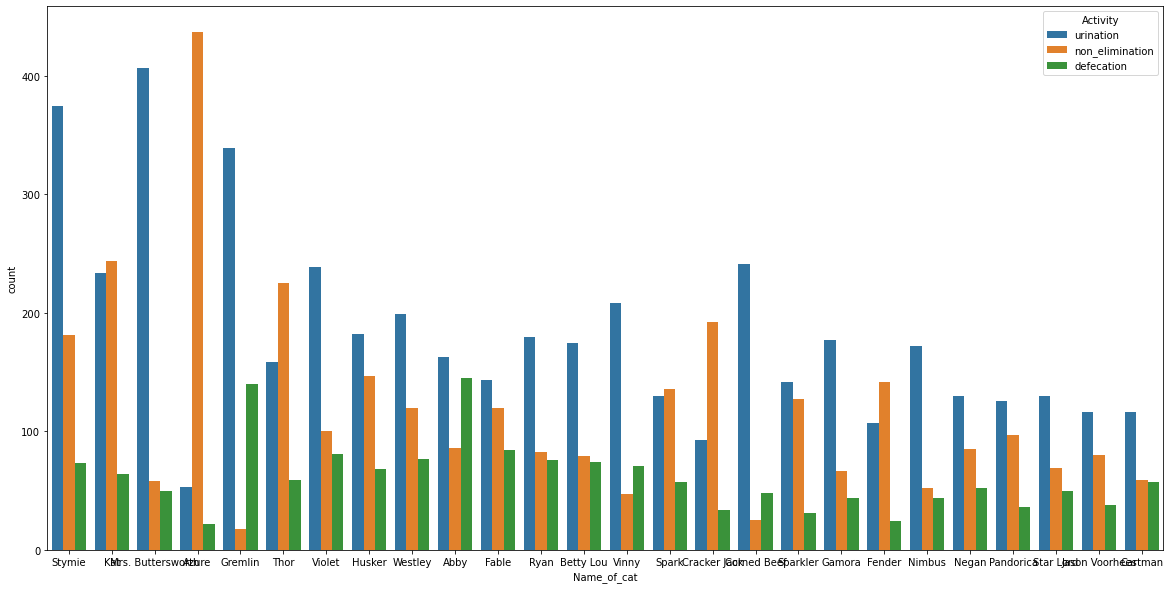

In [22]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.countplot(ax=ax, x = df['Name_of_cat'], hue = df['Activity'], order=df.Name_of_cat.value_counts().iloc[:26].index)

# Device ID

## Devices with Missing Tare Weight

In [23]:
print(len(df[df['Given_Tare_Weight'].isnull()].groupby(['Device_ID'])['Device_ID'].count()))
df[df['Given_Tare_Weight'].isnull()].groupby(['Device_ID'])['Device_ID'].count()

24


Device_ID
VA00000000000017     67
VA00000000000020     77
VA00000000000021     63
VA00000000000022     78
VA00000000000023     59
VA00000000000027     14
VA00000000000037    108
VA00000000000038     51
VA00000000000039     50
VA00000000000040      6
VA00000000000042      8
VA00000000000046     66
VA00000000000047     65
VA00000000000048     33
VA00000000000054      2
VA00000000000055     50
VA00000000000060     43
VA00000000000062    111
VA00000000000063      2
VA00000000000064     23
VA00000000000065     30
VA00000000000067      3
VA00000000000070      3
VA00000000000076      1
Name: Device_ID, dtype: int64

## Number of cats used a device

In [24]:
df.groupby(['Device_ID'])['Name_of_cat'].nunique().head(50)

# Number of cat used each device
# Most of the devices used by only one cat

Device_ID
VA00000000000017    1
VA00000000000020    1
VA00000000000021    1
VA00000000000022    1
VA00000000000023    1
VA00000000000027    1
VA00000000000037    7
VA00000000000038    5
VA00000000000039    1
VA00000000000040    1
VA00000000000041    1
VA00000000000042    5
VA00000000000043    1
VA00000000000044    1
VA00000000000045    1
VA00000000000046    1
VA00000000000047    6
VA00000000000048    4
VA00000000000049    1
VA00000000000050    1
VA00000000000051    1
VA00000000000054    1
VA00000000000055    5
VA00000000000057    1
VA00000000000058    1
VA00000000000059    2
VA00000000000060    1
VA00000000000061    1
VA00000000000062    1
VA00000000000063    1
VA00000000000064    2
VA00000000000065    2
VA00000000000067    3
VA00000000000069    1
VA00000000000070    1
VA00000000000072    1
VA00000000000073    1
VA00000000000075    1
VA00000000000076    1
VA00000000000108    1
VA00000000000109    1
VA00000000000110    1
VA00000000000113    5
VA00000000000115    1
VA00000000000119    1


## Number of devices used by a cat

In [25]:
df.groupby(['Name_of_cat'])['Device_ID'].nunique().head(60)

Name_of_cat
Abby                 3
Azure                3
Betty Lou            3
Bill                 1
Boots                2
Bucks                4
Cartman              4
Corned Beef          2
Cracker Jack         2
Doodle               2
Eraser               1
Espresso             2
Fable                3
Fender               2
Flop                 5
Frank                4
Gamora               1
Gramps               1
Gremlin              6
Husker               2
Jason Voorhees       2
Jessie               4
Kansas               2
Kat                  3
Lando                4
Lexi                 1
Marilyn              4
Marlowe              4
Meera                4
Monte                2
Mrs. Buttersworth    2
Negan                4
Nimbus               3
Pandorica            2
Patrick              4
Rowley               1
Ryan                 3
Shadow               4
Simon                1
Spark                2
Sparkler             3
Star Lord            2
Stymie               2

## Device first used and last used time

In [26]:
duration_of_device = df.groupby('Device_ID')['Event_start_time'].agg(['min', 'max'])
duration_of_device['days'] = duration_of_device['max'] - duration_of_device['min']
print(duration_of_device['days'].describe())
duration_of_device.head(50)

count                             82
mean     184 days 13:14:15.987804878
std      115 days 12:44:51.920921394
min                  1 days 01:50:09
25%          93 days 01:43:20.250000
50%         166 days 06:42:44.500000
75%                223 days 02:41:15
max                429 days 16:50:39
Name: days, dtype: object


,min,max,days
Device_ID,,,
VA00000000000017,2020-07-07 21:34:30+00:00,2020-09-07 23:32:58+00:00,62 days 01:58:28
VA00000000000020,2020-06-29 06:53:26+00:00,2020-08-09 18:27:29+00:00,41 days 11:34:03
VA00000000000021,2020-07-07 08:33:13+00:00,2020-09-04 00:31:49+00:00,58 days 15:58:36
VA00000000000022,2020-07-07 08:19:04+00:00,2020-10-02 11:14:13+00:00,87 days 02:55:09
VA00000000000023,2020-07-07 08:19:18+00:00,2020-08-16 09:38:29+00:00,40 days 01:19:11
VA00000000000027,2020-07-13 05:58:39+00:00,2020-09-01 08:54:26+00:00,50 days 02:55:47
VA00000000000037,2020-08-12 07:37:10+00:00,2021-10-16 00:27:49+00:00,429 days 16:50:39
VA00000000000038,2020-08-25 18:35:06+00:00,2021-09-26 19:54:45+00:00,397 days 01:19:39
VA00000000000039,2020-08-12 09:53:09+00:00,2020-12-27 15:40:27+00:00,137 days 05:47:18


## Device_ID and Activity relation

<AxesSubplot:xlabel='Device_ID', ylabel='count'>

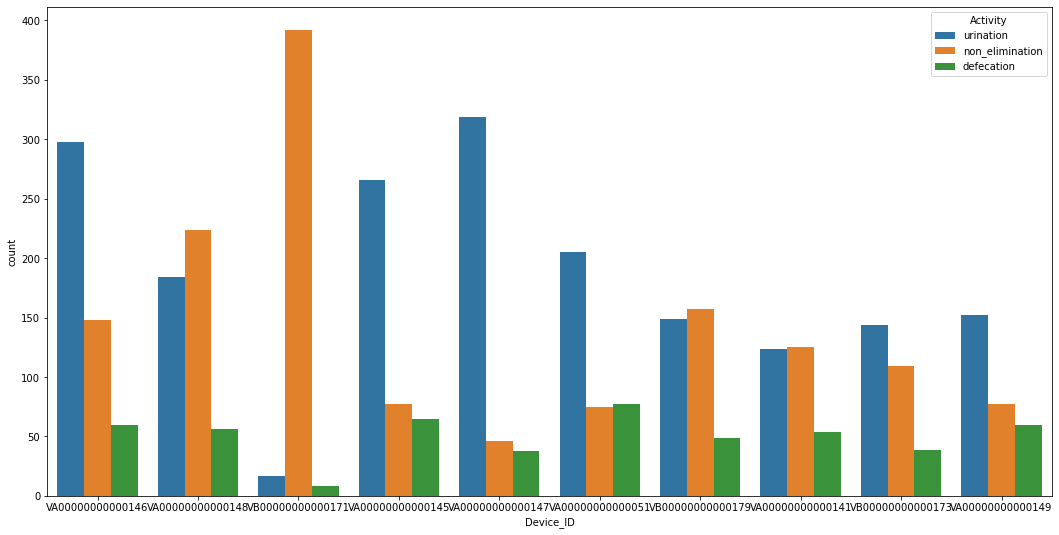

In [27]:
#temp = df[df['Device_ID'] == 'VB00000000000171']['Device_ID']
temp = df['Device_ID']
fig, ax = plt.subplots(figsize=(18, 9))
sns.countplot(ax=ax, x = temp, hue = df['Activity'], order=df.Device_ID.value_counts().iloc[:10].index)

<AxesSubplot:xlabel='Activity', ylabel='count'>

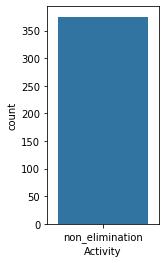

In [28]:
temp = df[(df['Device_ID'] == 'VB00000000000171') & (df['Name_of_cat'] == 'Azure')]

fig, ax = plt.subplots(figsize=(2, 4))
sns.countplot(ax=ax, x = temp['Activity'])

# Device_ID 'VB00000000000171' for cat 'Azure' has all non_elimination activity

In [29]:
len(df[(df['Device_ID'] == 'VB00000000000171') & (df['Name_of_cat'] == 'Azure')])

375

# Tare Weight

In [30]:
df.aggregate({"Calculated_Tare_Weight":['count', 'min', 'max', 'mean', 'std']})

,Calculated_Tare_Weight
count,13075.000000
min,-1734.125000
max,20009.400000
mean,9056.645771
std,3458.582048


## Tare Weight statistics for each device

In [31]:
#df.groupby(['Device_ID']).aggregate({"Tare_Weight":['count', 'min', 'max', 'mean', 'std']})
df.groupby(['Device_ID'])['Calculated_Tare_Weight'].describe()

,count,mean,std,min,25%,50%,75%,max
Device_ID,,,,,,,,
VA00000000000017,67.0,6820.660448,1625.165164,4340.950,5145.52500,6950.100,8340.20000,11144.200
VA00000000000020,77.0,8600.341883,1424.478005,6980.350,7322.32500,8230.275,9198.05000,13181.100
VA00000000000021,63.0,8798.180159,1592.371344,6177.300,8076.78750,8779.500,10514.53750,12855.125
VA00000000000022,78.0,7969.823077,1434.312155,6264.000,7045.93125,7630.425,8224.58125,11915.225
VA00000000000023,59.0,6042.494915,1668.302050,3351.200,4400.88750,6706.100,7080.63750,8607.550
...,...,...,...,...,...,...,...,...
VB00000000000188,147.0,9197.577721,1055.241312,3032.350,8801.12500,9446.300,9756.93750,10344.925
VB00000000000189,105.0,7322.448571,925.300009,3328.400,6942.12500,7404.825,7661.25000,8857.250
VB00000000000190,214.0,10430.770093,807.703113,6558.475,10171.01250,10432.150,10747.47500,12041.825


## Cat Weight for different cats

In [32]:
df.groupby(['Name_of_cat'])['Weight_of_cat'].describe().head(30)

,count,mean,std,min,25%,50%,75%,max
Name_of_cat,,,,,,,,
Abby,394.0,4322.939086,203.947821,3448.0,4198.00,4265.00,4498.50,4823.0
Azure,512.0,4454.781250,144.923406,3863.0,4361.00,4415.00,4556.25,4932.0
Betty Lou,328.0,4452.760671,99.623096,4001.0,4393.00,4450.75,4524.25,4720.0
Bill,114.0,5365.307018,111.265578,5154.0,5298.00,5329.50,5419.00,5756.0
Boots,232.0,3607.875000,170.068606,3206.0,3470.75,3587.00,3746.25,4152.0
Bucks,73.0,5029.684932,122.615464,4740.0,4943.00,5009.00,5094.00,5344.0
Cartman,232.0,5198.821121,92.862891,4945.0,5143.25,5179.50,5243.75,5600.0
Corned Beef,314.0,5961.990446,119.147759,5421.0,5888.25,5947.00,6041.00,6292.0
Cracker Jack,319.0,4431.253918,176.287541,3591.0,4269.00,4496.00,4551.00,4817.0


## Urination/Defecation ratio for different cats

In [33]:
df['non_elimination'] = df['Activity'].apply(lambda x: 1 if(x=='non_elimination') else 0)
df['urination'] = df['Activity'].apply(lambda x: 1 if(x=='urination') else 0)
df['defecation'] = df['Activity'].apply(lambda x: 1 if(x=='defecation') else 0)

a = df.groupby(['Name_of_cat']).aggregate({'Weight_of_cat':'mean',
                                       'Activity':'count',
                                       'non_elimination':'sum',
                                      'urination':'sum',
                                      'defecation':'sum',
                                      'non_elimination':'sum'}).sort_values(by='Weight_of_cat')

a['urination/defecation'] = a['urination']/a['defecation']
a

,Weight_of_cat,Activity,non_elimination,urination,defecation,urination/defecation
Name_of_cat,,,,,,
Marlowe,3180.763780,127,13,95,19,5.000000
Boots,3607.875000,232,13,169,50,3.380000
Meera,3650.875969,129,53,47,29,1.620690
Tiana,3712.367978,178,47,93,38,2.447368
Stymie,3721.810811,629,181,375,73,5.136986
Spark,3812.786378,323,136,130,57,2.280702
Gamora,3885.010417,288,67,177,44,4.022727
Flop,4059.626168,107,13,84,10,8.400000
Violet,4059.960714,420,100,239,81,2.950617


In [34]:
a['urination/defecation'].describe()

count    51.000000
mean      3.280139
std       1.634162
min       1.124138
25%       2.322169
50%       2.735294
75%       4.035173
max       8.400000
Name: urination/defecation, dtype: float64

## Stepping in time description for different activity 

In [35]:
df.groupby(['Activity'])['Stepping_In_Time'].describe().transpose()

Activity,defecation,non_elimination,urination
count,2316.000000,4146.000000,6610.000000
mean,4.333006,3.219154,2.024309
std,15.106587,13.075081,10.023979
min,0.000000,0.000000,0.000000
25%,0.025000,0.025000,0.025000
50%,0.025000,0.025000,0.025000
75%,0.025000,0.100000,0.025000
max,195.075000,238.574947,281.449960


In [36]:
df.groupby(['Name_of_cat', 'Activity'])['Stepping_In_Time'].describe().head(30)

count       mean        std    min    25%  \
Name_of_cat  Activity                                                     
Abby         defecation       145.0   2.251282  11.221252  0.000  0.025   
             non_elimination   86.0   3.198440  12.634179  0.000  0.025   
             urination        163.0   0.906641   6.698999  0.000  0.025   
Azure        defecation        22.0   0.900968   4.209174  0.000  0.000   
             non_elimination  437.0   2.402768  10.099289  0.000  0.025   
             urination         53.0   3.285019  12.845168  0.000  0.000   
Betty Lou    defecation        74.0   3.929527  11.251583  0.000  0.025   
             non_elimination   79.0   2.200631  10.842357  0.000  0.025   
             urination        175.0   2.238313   9.945674  0.000  0.025   
Bill         defecation        14.0   6.701774  16.196623  0.025  0.025   
             non_elimination   46.0   3.495106  15.684862  0.000  0.025   
             urination         54.0   0.455552   1.947324  0.025  0.025   
Boots        defecation        50.0   8.030982  16.563987  0.000  0.000   
             non_elimination   13.0  10.273061  22.886673  0.000  0.000   
             urination        169.0   1.171743   6.751648  0.000  0.000   
Bucks        defecation        12.0   2.446582   7.006009  0.025  0.025   
             non_elimination   32.0   0.953073   2.028845  0.000  0.025   
             urination         29.0   3.706005  17.209819  0.000  0.025   
Cartman      defecation        57.0   6.145946  16.481597  0.025  0.025   
             non_elimination   59.0   2.788934  10.621565  0.025  0.025   
             urination        116.0   5.407644  11.048583  0.025  0.025   
Corned Beef  defecation        48.0   3.171749  10.757654  0.025  0.025   
             non_elimination   25.0  16.142862  40.533619  0.025  0.025   
             urination        241.0   1.311304   6.761829  0.000  0.025   
Cracker Jack defecation        34.0   3.347052  11.413633  0.000  0.025   
             non_elimination  192.0   3.591941  14.151324  0.000  0.025   
             urination         93.0   3.196499  12.310589  0.000  0.025   
Doodle       defecation        28.0   7.657136  31.407130  0.025  0.025   
             non_elimination   60.0   5.467907  18.458430  0.025  0.025   
             urination         55.0   0.815908   4.684684  0.025  0.025   

                                50%        75%         max  
Name_of_cat  Activity                                       
Abby         defecation       0.025   0.025000   79.899949  
             non_elimination  0.025   0.025000   89.535430  
             urination        0.025   0.025000   74.906804  
Azure        defecation       0.000   0.000000   19.746306  
             non_elimination  0.025   0.525000   89.049697  
             urination        0.000   0.025000   77.226252  
Betty Lou    defecation       0.025   0.300000   50.810467  
             non_elimination  0.025   0.025000   78.549934  
             urination        0.025   0.025000   80.730476  
Bill         defecation       0.025   0.025000   58.349944  
             non_elimination  0.025   0.025000   93.999949  
             urination        0.025   0.025000   13.099947  
Boots        defecation       0.025   8.499938   67.999932  
             non_elimination  0.000   0.000000   67.574930  
             urination        0.000   0.025000   48.274939  
Bucks        defecation       0.025   1.094666   24.578769  
             non_elimination  0.025   0.769186    8.255639  
             urination        0.025   0.025000   92.899931  
Cartman      defecation       0.025   0.625000  107.249932  
             non_elimination  0.025   0.025000   55.249947  
             urination        0.025   5.344857   45.026476  
Corned Beef  defecation       0.025   0.031250   51.214730  
             non_elimination  0.025  12.724937  189.949944  
             urination        0.025   0.025000   61.149957  
Cracker Jack defecation       0.025   0.025

## Stepping out time description for different activity 

In [37]:
df.groupby(['Name_of_cat', 'Activity'])['Stepping_Out_Time'].describe().head(30)

count        mean        std        min  \
Name_of_cat  Activity                                                   
Abby         defecation       145.0  111.304844  38.921812   0.000000   
             non_elimination   86.0   63.711198  55.010398   0.000000   
             urination        163.0   75.715479  52.628329   0.000000   
Azure        defecation        22.0   18.701244  42.878707   0.000000   
             non_elimination  437.0   34.575627  31.195159   0.000000   
             urination         53.0   15.332174  33.593387   0.000000   
Betty Lou    defecation        74.0   90.696687  51.938491   0.000000   
             non_elimination   79.0   33.183832  36.499716   0.000000   
             urination        175.0   34.479474  30.827512   0.000000   
Bill         defecation        14.0  108.905302  35.931366  32.974935   
             non_elimination   46.0   20.954294  26.318971   0.000000   
             urination         54.0   42.970316  18.619902  14.574942   
Boots        defecation        50.0   55.200967  50.693013   0.000000   
             non_elimination   13.0   14.348064  29.753415   0.000000   
             urination        169.0   14.206183  18.470669   0.000000   
Bucks        defecation        12.0   83.501097  24.610475  35.202565   
             non_elimination   32.0   25.971157  22.166588   0.000000   
             urination         29.0   43.997249  36.041516   0.000000   
Cartman      defecation        57.0   84.310485  21.005470  28.974939   
             non_elimination   59.0   23.916101  33.354649   0.225000   
             urination        116.0   52.149830  20.368711  20.074934   
Corned Beef  defecation        48.0  141.095374  50.523420  87.374947   
             non_elimination   25.0   48.847874  47.939718   0.525000   
             urination        241.0   71.098431  36.767010   0.000000   
Cracker Jack defecation        34.0  102.106704  67.860458   0.000000   
             non_elimination  192.0   42.250506  44.196215   0.000000   
             urination         93.0   63.819126  45.722104   0.000000   
Doodle       defecation        28.0  135.102625  42.944685  51.349948   
             non_elimination   60.0   60.846608  54.493441   1.899943   
             urination         55.0   53.889942  19.323137  24.774953   

                                     25%         50%         75%         max  
Name_of_cat  Activity                                                         
Abby         defecation        90.220850  108.499946  130.899943  271.524950  
             non_elimination   19.339737   51.488595   96.237445  250.274931  
             urination         44.423621   60.349955   87.175987  322.782283  
Azure        defecation         0.000000    0.000000    0.000000  153.812569  
             non_elimination   13.558702   25.750854   47.905492  162.305380  
             urination          0.000000    0.000000   20.383501  188.282619  
Betty Lou    defecation        70.630022   97.831085  109.047921  281.953804  
             non_elimination    8.864262   19.879934   44.797292  170.975063  
             urination         21.070800   27.874949   42.832255  200.850510  
Bill         defecation        99.593705  110.487444  117.837441  170.274931  
             non_elimination    3.656191   11.987442   24.324965  110.049938  
             urination         28.956184   39.149978   51.668683  102.924949  
Boots        defecation         0.000000   68.437466   98.087434  150.924931  
             non_elimination    0.000000    0.000000    0.000000   81.999966  
             urination          0.000000    0.000000   24.124958  123.574933  
Bucks        defecation        71.817584   79.831259  103.798063  124.424943  
             non_elimination   13.146310   23.449425   37.583395   88.409342  
             urination         24.574933   42.046282   53.550038  165.499940  
Cartman      defecation        72.699934   82.149943   94.831557  130.274932  
             non_elimination    4.

# Sit Time

In [38]:
df.groupby(['Activity'])['Sit_Time'].describe().transpose()

Activity,defecation,non_elimination,urination
count,2316.000000,4146.000000,6610.000000
mean,85.618380,27.103528,44.688873
std,64.280994,34.558095,38.019654
min,0.000000,0.000000,0.000000
25%,40.868696,4.108067,17.937443
50%,89.387430,16.106756,42.649656
75%,125.152743,35.310688,62.577861
max,609.075881,346.155122,356.183910


## Sit time for each cat across different activity

In [39]:
df.groupby(['Name_of_cat', 'Activity'])['Sit_Time'].describe().head(30)

# defecation - longest mean sit time
# urination - mean sit time significantly different from defecation and non-elimination, std = 1.68 times mean
# non_elimination - shortest mean sit time, std = 0.85 times mean

count        mean        std        min  \
Name_of_cat  Activity                                                   
Abby         defecation       145.0  109.053562  39.102495   0.000000   
             non_elimination   86.0   60.512758  53.601131   0.000000   
             urination        163.0   74.808838  50.122298   0.000000   
Azure        defecation        22.0   17.800276  41.661143   0.000000   
             non_elimination  437.0   32.172860  28.481138   0.000000   
             urination         53.0   12.047155  23.276268   0.000000   
Betty Lou    defecation        74.0   86.767160  50.144118   0.000000   
             non_elimination   79.0   30.983201  32.710899   0.000000   
             urination        175.0   32.241161  26.845045   0.000000   
Bill         defecation        14.0  102.203527  33.435407  32.949935   
             non_elimination   46.0   17.459187  22.941490   0.000000   
             urination         54.0   42.514764  18.829347  14.549942   
Boots        defecation        50.0   47.169985  42.436995   0.000000   
             non_elimination   13.0    4.075003   7.878978   0.000000   
             urination        169.0   13.034439  15.407872   0.000000   
Bucks        defecation        12.0   81.054515  24.924797  34.302196   
             non_elimination   32.0   25.018085  21.480258   0.000000   
             urination         29.0   40.291244  27.865249   0.000000   
Cartman      defecation        57.0   78.164540  20.039253  18.725000   
             non_elimination   59.0   21.127167  29.684019   0.150000   
             urination        116.0   46.742186  16.088500  12.724995   
Corned Beef  defecation        48.0  137.923625  50.801668  87.349947   
             non_elimination   25.0   32.705012  23.078841   0.500000   
             urination        241.0   69.787126  36.362856   0.000000   
Cracker Jack defecation        34.0   98.759652  66.281721   0.000000   
             non_elimination  192.0   38.658564  38.101041   0.000000   
             urination         93.0   60.622627  42.234698   0.000000   
Doodle       defecation        28.0  127.445489  33.549002  51.324948   
             non_elimination   60.0   55.378701  52.630894   1.874943   
             urination         55.0   53.074035  18.940529  24.749953   

                                     25%         50%         75%         max  
Name_of_cat  Activity                                                         
Abby         defecation        88.418084  106.324950  130.184372  271.499950  
             non_elimination   19.314737   45.212475   83.037448  250.249931  
             urination         44.248647   59.559672   87.150987  253.699949  
Azure        defecation         0.000000    0.000000    0.000000  153.787569  
             non_elimination   13.205268   24.357413   45.726226  161.359413  
             urination          0.000000    0.000000   20.358501  111.056367  
Betty Lou    defecation        66.642896   92.981811  106.806628  281.653804  
             non_elimination    8.562473   19.229934   42.408992  154.149945  
             urination         20.808306   27.501697   41.063089  200.825510  
Bill         defecation        98.274967  110.037456  111.731223  160.549942  
             non_elimination    3.356192   10.512470   20.981182  110.024938  
             urination         28.831184   38.450004   51.643683  102.899949  
Boots        defecation         0.000000   65.150002   80.968699  123.649938  
             non_elimination    0.000000    0.000000    0.000000   21.475000  
             urination          0.000000    0.000000   23.699934   86.374977  
Bucks        defecation        67.104333   75.702179  102.533645  124.399943  
             non_elimination   13.121310   23.040254   34.004461   88.225032  
             urination         24.549933   41.744198   53.525038  127.451496  
Cartman      defecation        69.298626   79.999937   85.624996  130.249932  
             non_elimination    4.

<AxesSubplot:xlabel='Sit_Time', ylabel='Name_of_cat'>

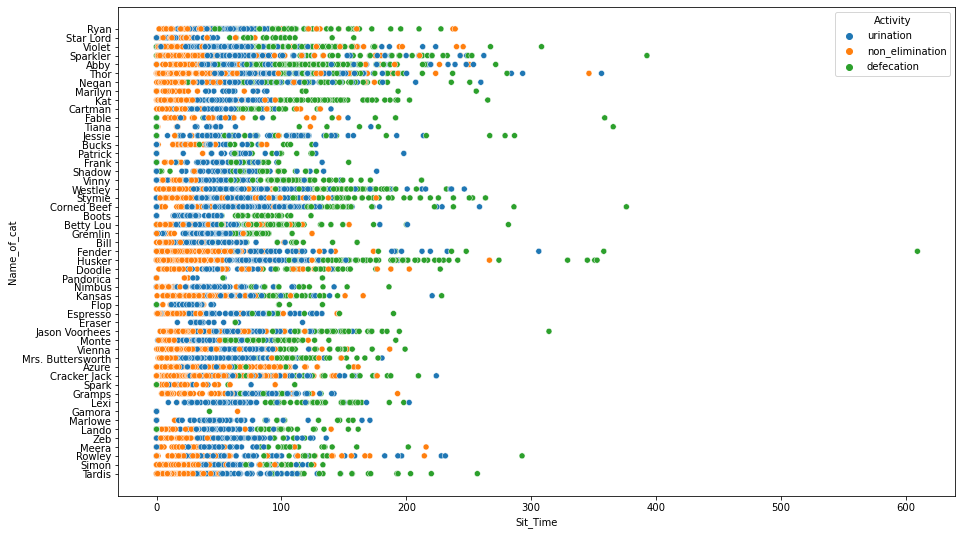

In [40]:
fig, ax = plt.subplots(figsize=(15, 9))
sns.scatterplot(data=df, x="Sit_Time", y="Name_of_cat", hue = 'Activity')

# Weight Variance

In [41]:
df.groupby(['Activity'])['Weight_Variance'].describe().transpose()

Activity,defecation,non_elimination,urination
count,2.316000e+03,4.146000e+03,6.610000e+03
mean,1.104860e+06,1.137375e+06,1.215640e+06
std,1.680122e+06,1.446473e+06,1.725219e+06
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,9.024300e+04,1.904097e+05,1.128361e+05
50%,2.173810e+05,5.622228e+05,3.032603e+05
75%,1.374780e+06,1.517217e+06,1.867754e+06
max,7.840362e+06,2.383244e+07,8.730524e+06


## Weight Variance of different cats for different activities

In [42]:
df.groupby(['Name_of_cat', 'Activity'])['Weight_Variance'].describe().head(15)

count          mean           std            min  \
Name_of_cat Activity                                                            
Abby        defecation       145.0  2.059562e+05  5.234806e+05    8626.947417   
            non_elimination   86.0  3.426489e+05  4.446607e+05       0.000000   
            urination        163.0  3.243737e+05  8.332743e+05       0.000000   
Azure       defecation        22.0  3.725191e+06  1.744460e+06   37877.019942   
            non_elimination  437.0  9.939800e+05  1.620901e+06     290.576232   
            urination         53.0  3.286880e+06  1.771081e+06   67744.544209   
Betty Lou   defecation        74.0  1.166959e+06  1.842673e+06   16274.156710   
            non_elimination   79.0  8.821822e+05  1.255852e+06   17436.721683   
            urination        175.0  1.436474e+06  1.577297e+06   10465.482995   
Bill        defecation        14.0  1.295795e+05  4.761415e+04   67765.827001   
            non_elimination   46.0  6.369265e+05  7.306148e+05       0.000000   
            urination         54.0  1.669767e+05  9.682743e+04   39045.249354   
Boots       defecation        50.0  1.233562e+06  1.292813e+06   22579.766001   
            non_elimination   13.0  1.412573e+06  9.032182e+05  269983.725108   
            urination        169.0  1.288835e+06  1.166951e+06   13211.319162   

                                      25%           50%           75%  \
Name_of_cat Activity                                                    
Abby        defecation       4.978502e+04  8.482815e+04  1.470362e+05   
            non_elimination  8.246231e+04  1.722141e+05  4.472497e+05   
            urination        5.995583e+04  1.255709e+05  2.094349e+05   
Azure       defecation       4.117006e+06  4.479135e+06  4.681027e+06   
            non_elimination  2.895337e+05  5.911230e+05  1.133000e+06   
            urination        1.273435e+06  4.242765e+06  4.461649e+06   
Betty Lou   defecation       5.249359e+04  1.395525e+05  7.874507e+05   
            non_elimination  1.677902e+05  3.846608e+05  9.001826e+05   
            urination        1.430390e+05  8.955770e+05  2.137029e+06   
Bill        defecation       8.803081e+04  1.289767e+05  1.576267e+05   
            non_elimination  1.473116e+05  2.941039e+05  8.236365e+05   
            urination        8.661648e+04  1.501409e+05  2.166196e+05   
Boots       defecation       9.580451e+04  2.907140e+05  2.701796e+06   
            non_elimination  5.533058e+05  1.626256e+06  2.007137e+06   
            urination        1.141565e+05  1.727897e+06  2.433356e+06   

                                      max  
Name_of_cat Activity                       
Abby        defecation       4.226727e+06  
            non_elimination  2.956679e+06  
            urination        5.011460e+06  
Azure       defecation       4.980256e+06  
            non_elimination  2.383244e+07  
            urination        4.920909e+06  
Betty Lou   defecation       5.015052e+06  
            non_elimination  4.935714e+06  
            urination        4.957828e+06  
Bill        defecation       2.180761e+05  
            non_elimination  3.425873e+06  
            urination        4.809849e+05  
Boots       defecation       2.962714e+06  
            non_elimination  2.607137e+06  
            urination        3.026907e+06

<AxesSubplot:xlabel='Weight_Variance', ylabel='Name_of_cat'>

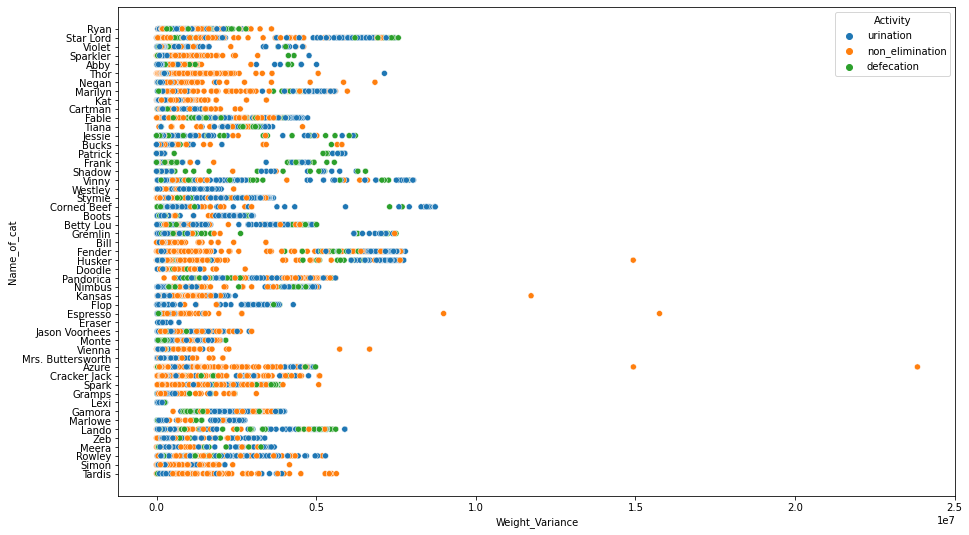

In [43]:
fig, ax = plt.subplots(figsize=(15, 9))
sns.scatterplot(data=df, x="Weight_Variance", y="Name_of_cat", hue = 'Activity')

# Times Stepped

In [44]:
df.groupby(['Activity'])['Times_Stepped'].describe().transpose()

Activity,defecation,non_elimination,urination
count,2316.000000,4146.000000,6610.000000
mean,1.702936,1.413411,1.523298
std,5.492725,3.391802,5.042457
min,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000
50%,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000
max,200.000000,117.000000,292.000000


## Times stepped for each Activity for different cats

In [45]:
df.groupby(['Name_of_cat', 'Activity'])['Times_Stepped'].describe().head(15)

count      mean       std  min  25%  50%   75%  \
Name_of_cat Activity                                                          
Abby        defecation       145.0  1.220690  0.861757  0.0  1.0  1.0  1.00   
            non_elimination   86.0  1.325581  1.192544  0.0  1.0  1.0  1.00   
            urination        163.0  1.073620  0.572608  0.0  1.0  1.0  1.00   
Azure       defecation        22.0  0.227273  0.528413  0.0  0.0  0.0  0.00   
            non_elimination  437.0  1.196796  0.966261  0.0  1.0  1.0  1.00   
            urination         53.0  0.490566  0.973152  0.0  0.0  0.0  1.00   
Betty Lou   defecation        74.0  1.283784  1.164783  0.0  1.0  1.0  1.00   
            non_elimination   79.0  1.000000  0.599145  0.0  1.0  1.0  1.00   
            urination        175.0  1.657143  2.749533  0.0  1.0  1.0  2.00   
Bill        defecation        14.0  1.357143  0.633324  1.0  1.0  1.0  1.75   
            non_elimination   46.0  1.369565  1.161583  0.0  1.0  1.0  1.00   
            urination         54.0  1.148148  0.407820  1.0  1.0  1.0  1.00   
Boots       defecation        50.0  1.460000  2.091870  0.0  0.0  1.0  2.00   
            non_elimination   13.0  0.538462  1.050031  0.0  0.0  0.0  0.00   
            urination        169.0  0.562130  0.634324  0.0  0.0  0.0  1.00   

                              max  
Name_of_cat Activity               
Abby        defecation        7.0  
            non_elimination   8.0  
            urination         5.0  
Azure       defecation        2.0  
            non_elimination  10.0  
            urination         4.0  
Betty Lou   defecation        8.0  
            non_elimination   3.0  
            urination        32.0  
Bill        defecation        3.0  
            non_elimination   8.0  
            urination         3.0  
Boots       defecation        9.0  
            non_elimination   3.0  
            urination         3.0

# Points Count

In [46]:
df.groupby(['Activity'])['Points_Count'].describe().transpose()

# Clear difference in Points_Count for different Activities

Activity,defecation,non_elimination,urination
count,2316.000000,4146.000000,6610.000000
mean,5224.679620,1873.308490,3009.869592
std,2315.531767,1973.855044,1826.140174
min,0.000000,0.000000,0.000000
25%,3645.500000,571.000000,1760.000000
50%,4878.500000,1212.500000,2529.000000
75%,6315.500000,2619.000000,3871.000000
max,24427.000000,26592.000000,18112.000000


## Points Count for different cats on different activities

In [47]:
df.groupby(['Name_of_cat', 'Activity'])['Points_Count'].describe().head(30)

count         mean          std     min  \
Name_of_cat  Activity                                                   
Abby         defecation       145.0  4577.972414  1538.043016   564.0   
             non_elimination   86.0  2661.383721  2414.610845     0.0   
             urination        163.0  3182.975460  2008.016363     0.0   
Azure        defecation        22.0  6200.863636  1875.625262  2861.0   
             non_elimination  437.0  1807.789474  1453.632717     9.0   
             urination         53.0  4848.603774  2568.910457   814.0   
Betty Lou    defecation        74.0  4873.486486  1868.820390  2088.0   
             non_elimination   79.0  2214.126582  2243.635422    60.0   
             urination        175.0  2378.022857  1572.391567   620.0   
Bill         defecation        14.0  4179.142857  1310.510051  1319.0   
             non_elimination   46.0   719.369565   915.917205     0.0   
             urination         54.0  1724.888889   749.237541   583.0   
Boots        defecation        50.0  5146.140000  2017.519684  2096.0   
             non_elimination   13.0  3234.384615  2222.742021   579.0   
             urination        169.0  2454.733728  1553.602551     7.0   
Bucks        defecation        12.0  3490.000000  1475.342302  1372.0   
             non_elimination   32.0  1388.062500  1024.069584     0.0   
             urination         29.0  1619.827586  1117.365846     0.0   
Cartman      defecation        57.0  3228.789474   754.166255  1159.0   
             non_elimination   59.0   874.796610  1210.128075     9.0   
             urination        116.0  2002.681034   696.256232   770.0   
Corned Beef  defecation        48.0  5656.208333  2091.132676  3495.0   
             non_elimination   25.0  1562.080000  1328.153791    21.0   
             urination        241.0  3031.535270  1457.093462   844.0   
Cracker Jack defecation        34.0  5474.205882  2133.037623  2135.0   
             non_elimination  192.0  2172.687500  1771.903368    56.0   
             urination         93.0  3273.430108  1738.602221  1260.0   
Doodle       defecation        28.0  5632.642857  1369.611359  2054.0   
             non_elimination   60.0  2405.883333  2232.735034    76.0   
             urination         55.0  2388.545455  1047.147639   991.0   

                                  25%     50%      75%      max  
Name_of_cat  Activity                                            
Abby         defecation       3676.00  4401.0  5306.00  10861.0  
             non_elimination   865.50  2057.0  3446.75  13408.0  
             urination        1842.00  2478.0  3639.00  10149.0  
Azure        defecation       5376.00  6077.0  6720.00  10208.0  
             non_elimination   648.00  1348.0  2539.00   8685.0  
             urination        3680.00  4288.0  6304.00  12160.0  
Betty Lou    defecation       3658.50  4360.5  6005.25  11293.0  
             non_elimination   622.00  1504.0  3014.50  12288.0  
             urination        1221.00  1761.0  3343.50   9760.0  
Bill         defecation       3935.75  4403.5  4657.75   6427.0  
             non_elimination   139.75   454.5   854.50   4401.0  
             urination        1199.00  1630.0  2075.00   4117.0  
Boots        defecation       3457.25  4399.5  6528.00   9568.0  
             non_elimination  2560.00  2912.0  3360.00   9056.0  
             urination         980.00  3040.0  3488.00   8256.0  
Bucks        defecation       2858.50  3185.0  4096.25   7359.0  
             non_elimination   760.50  1048.5  1702.00   4000.0  
             urination         983.00  1680.0  2142.00   5074.0  
Cartman      defecation       2849.00  3202.0  3649.00   5211.0  
             non_elimination   180.00   473.0   868.50   5250.0  
             urination        1569.00  1911.5  2320.75   5698.0  
Corned Beef  defecation       4409.50  5142.0  6024.50  15045.0  
             non_elimination   788.00  1292.0  1834.00   5613.0  
             urination        2036.00  2701

<AxesSubplot:xlabel='Points_Count', ylabel='Name_of_cat'>

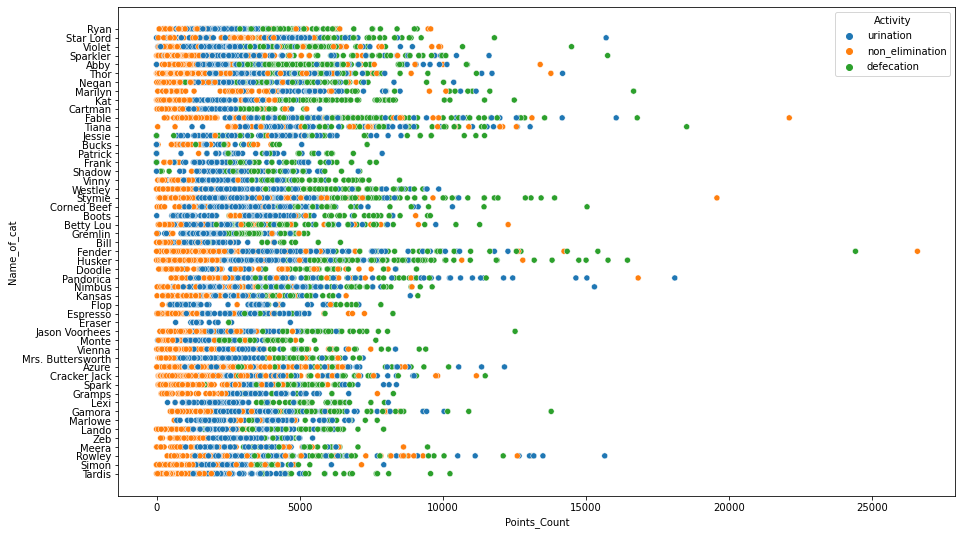

In [48]:
fig, ax = plt.subplots(figsize=(15, 9))
sns.scatterplot(data=df, x="Points_Count", y="Name_of_cat", hue = 'Activity')

# Points Percentage

In [49]:
df.groupby(['Activity'])['Points_Percentage'].describe().transpose()

# Clear difference in Points_Count for different Activities

Activity,defecation,non_elimination,urination
count,2316.000000,4146.000000,6610.000000
mean,0.769052,0.567070,0.664080
std,0.198590,0.320443,0.260095
min,0.000000,0.000000,0.000000
25%,0.609015,0.279030,0.442162
50%,0.745247,0.575823,0.606483
75%,0.999542,0.861397,0.999273
max,1.000000,1.000000,1.000000


## Points Percentage for different cats on different activities

In [50]:
df.groupby(['Name_of_cat', 'Activity'])['Points_Percentage'].describe().head(30)

count      mean       std       min       25%  \
Name_of_cat  Activity                                                         
Abby         defecation       145.0  0.801079  0.151509  0.235000  0.675027   
             non_elimination   86.0  0.546454  0.215387  0.000000  0.401489   
             urination        163.0  0.661835  0.197788  0.000000  0.517619   
Azure        defecation        22.0  0.928045  0.160040  0.521067  1.000000   
             non_elimination  437.0  0.714367  0.198005  0.017578  0.590049   
             urination         53.0  0.844554  0.268341  0.254375  0.680093   
Betty Lou    defecation        74.0  0.827114  0.168713  0.462766  0.651372   
             non_elimination   79.0  0.632198  0.271170  0.024671  0.472410   
             urination        175.0  0.717113  0.237434  0.179111  0.613814   
Bill         defecation        14.0  0.581470  0.128084  0.269550  0.548169   
             non_elimination   46.0  0.185320  0.165083  0.000000  0.051660   
             urination         54.0  0.390129  0.105528  0.151125  0.316793   
Boots        defecation        50.0  0.755541  0.212835  0.464539  0.572510   
             non_elimination   13.0  0.810947  0.361072  0.101650  1.000000   
             urination        169.0  0.652250  0.359660  0.002878  0.287146   
Bucks        defecation        12.0  0.803899  0.129835  0.558640  0.724544   
             non_elimination   32.0  0.501723  0.307965  0.000000  0.238203   
             urination         29.0  0.442434  0.288691  0.000000  0.289800   
Cartman      defecation        57.0  0.538123  0.073377  0.323382  0.516369   
             non_elimination   59.0  0.197049  0.174212  0.003750  0.069444   
             urination        116.0  0.427256  0.083446  0.108964  0.379103   
Corned Beef  defecation        48.0  0.782158  0.150477  0.404566  0.659965   
             non_elimination   25.0  0.371219  0.238589  0.008635  0.186207   
             urination        241.0  0.630191  0.213705  0.201336  0.459727   
Cracker Jack defecation        34.0  0.764307  0.188979  0.462766  0.622393   
             non_elimination  192.0  0.593312  0.306648  0.014597  0.361870   
             urination         93.0  0.644693  0.210461  0.342391  0.483519   
Doodle       defecation        28.0  0.674418  0.056153  0.458482  0.650769   
             non_elimination   60.0  0.388392  0.227866  0.030449  0.180353   
             urination         55.0  0.471877  0.078081  0.289428  0.411271   

                                   50%       75%       max  
Name_of_cat  Activity                                       
Abby         defecation       0.887868  0.917558  1.000000  
             non_elimination  0.557209  0.681368  1.000000  
             urination        0.661389  0.827455  1.000000  
Azure        defecation       1.000000  1.000000  1.000000  
             non_elimination  0.743094  0.853198  1.000000  
             urination        1.000000  1.000000  1.000000  
Betty Lou    defecation       0.895854  0.938672  1.000000  
             non_elimination  0.650145  0.822896  1.000000  
             urination        0.745336  0.912539  1.000000  
Bill         defecation       0.628123  0.645166  0.725068  
             non_elimination  0.151873  0.260576  0.645687  
             urination        0.387825  0.447646  0.649779  
Boots        defecation       0.628201  1.000000  1.000000  
             non_elimination  1.000000  1.000000  1.000000  
             urination        1.000000  1.000000  1.000000  
Bucks        defecation       0.846264  0.881547  0.999864  
             non_elimination  0.436687  0.713892  1.000000  
             urination        0.410679  0.729583  0.916546  
Cartman      defecation       0.547440  0.581019  0.708287  
             non_elimination  0.147372  0.260442  0.683594  
             urination        0.434480  0.480222  0.627976  
Corned Beef  defecation       0.788832  0.924247  0.999755  
             non_elimination  0.37551

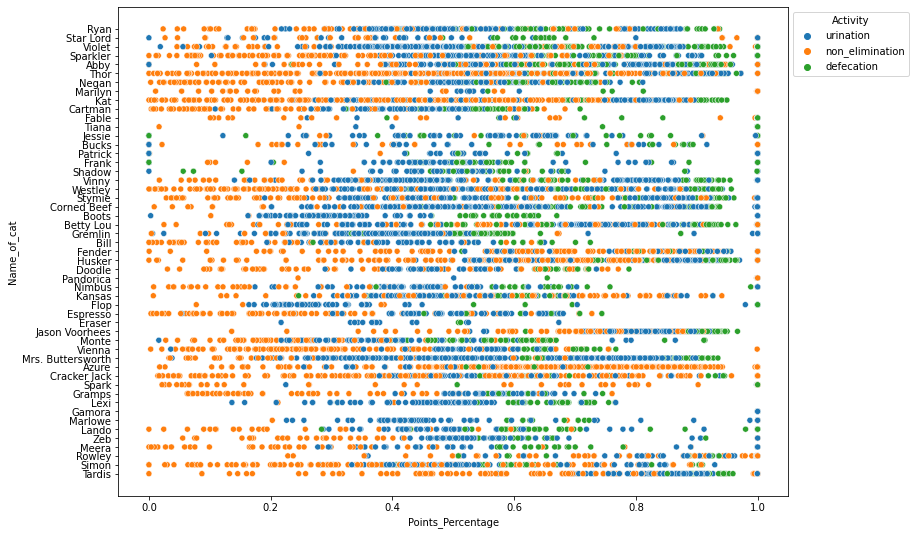

In [51]:
fig, ax = plt.subplots(figsize=(12, 9))
sns.scatterplot(data=df, x="Points_Percentage", y="Name_of_cat", hue = 'Activity')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

# Start Time in Hours

In [52]:
df.groupby(['Activity'])['Event_start_time_hour'].describe()

,count,mean,std,min,25%,50%,75%,max
Activity,,,,,,,,
defecation,2316.0,9.168826,6.380620,0.0,4.75,7.0,14.0,23.0
non_elimination,4146.0,10.317897,6.769709,0.0,5.00,9.0,15.0,23.0
urination,6610.0,11.066868,6.758444,0.0,6.00,10.0,16.0,23.0


In [53]:
df.groupby(['Name_of_cat', 'Activity'])['Event_start_time_hour'].describe()

count       mean       std  min  25%   50%   75%  \
Name_of_cat Activity                                                            
Abby        defecation       145.0  10.786207  7.081065  0.0  5.0  10.0  16.0   
            non_elimination   86.0   9.767442  7.322286  0.0  4.0   8.0  16.0   
            urination        163.0  11.588957  6.959078  0.0  7.0  11.0  17.0   
Azure       defecation        22.0   9.863636  4.843213  1.0  6.0  11.0  13.0   
            non_elimination  437.0   9.723112  7.276249  0.0  4.0   7.0  15.0   
...                            ...        ...       ...  ...  ...   ...   ...   
Westley     non_elimination  120.0   9.558333  6.990745  0.0  3.0   8.0  15.0   
            urination        199.0   9.738693  6.865376  0.0  4.0   8.0  15.0   
Zeb         defecation        18.0   7.166667  7.578996  1.0  2.0   3.0  13.0   
            non_elimination   28.0   8.285714  6.553807  1.0  3.0   6.5  14.0   
            urination         73.0   8.958904  6.216998  0.0  2.0   8.0  15.0   

                              max  
Name_of_cat Activity               
Abby        defecation       23.0  
            non_elimination  23.0  
            urination        23.0  
Azure       defecation       20.0  
            non_elimination  23.0  
...                           ...  
Westley     non_elimination  23.0  
            urination        23.0  
Zeb         defecation       20.0  
            non_elimination  20.0  
            urination        20.0  

[152 rows x 8 columns]

In [54]:
df = pd.read_csv('final.csv')